In [2]:
import numpy as np

In [4]:
# 농어 데이터
# 농어의 길이로 무게를 예측해보자

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
# 훈련세트와 테스트세트로 나눈다.
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [6]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42,), (14,), (42,), (14,))

In [7]:
# 특성데이터를 2차원 배열로 변환
# numpy의 reshape() 메서드를 사용한다
train_input = train_input.reshape(-1, 1) # 변형 원하는 크기 입력 (행,열)
test_input = test_input.reshape(-1, 1)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

# 훈련
knr.fit(train_input, train_target) # train용 데이터

KNeighborsRegressor(n_neighbors=3)

In [10]:
knr.predict([[50]]) # 농어의 길이가 50cm이면 무게가 몇이니
# array([1033.33333333])
# 실제 농어의 무게는 이보다 훨씬 더 나간다. 무엇이 문제일까?

array([1033.33333333])

In [12]:
from scipy.spatial import distance
# 문제 파악을 위해 시각화해보자
# 먼저 k-최근접이웃 모델의 kneighbors 메서드를 이용하여 해당 농어와 제일 가까운 이웃의 인덱스를 얻자

distance, indexes = knr.kneighbors([[50]]) # 무게가 50인 농어의 이웃의 거리와 인덱스를 반환해줘
distance, indexes

(array([[6., 7., 7.]]), array([[34,  8, 14]]))

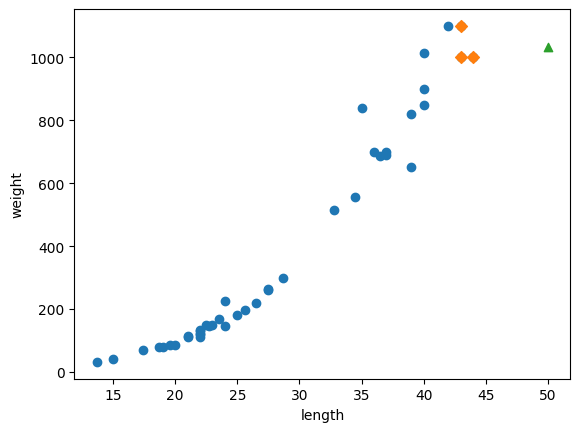

In [14]:
# 위 데이터를 바탕으로 산점도를 그려보자
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target) # 전체 농어의 데이터 x:길이 y:무게

# 수상한 농어의 이웃만 다시 그려보자
# 전체 농어 배열 데이터의 인덱스란에, 위에서 얻어낸 이웃 농어들의 인덱스를 담은 변수를 넣는다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 수상한 농어도 표시해보자
plt.scatter(50,1033, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [15]:
#(수상한농어의 무게) = (수상한 농어의 최근방이웃 3마리 농어의 무게의 평균)
# 위 산점도를 보면 이웃 농어들의 무게가 1000언저리에서 머무른다.
# 직접 이웃들의 평균을 내어 확인해보자

np.mean(train_target[indexes])

# 1033.3333333333333
# 아까 예측값과 일치한다

# 즉, k-최근접이웃회귀는 가장 가까운 샘플을 찾아 타깃을 평균하므로, 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다

1033.3333333333333

In [16]:
### 이번엔 100cm 농어의 무게를 예측해보자
# 위의 논리대로라면 여전히 최근방 이웃 농어 무게의 평균인 1000 언저리로 예측할 것

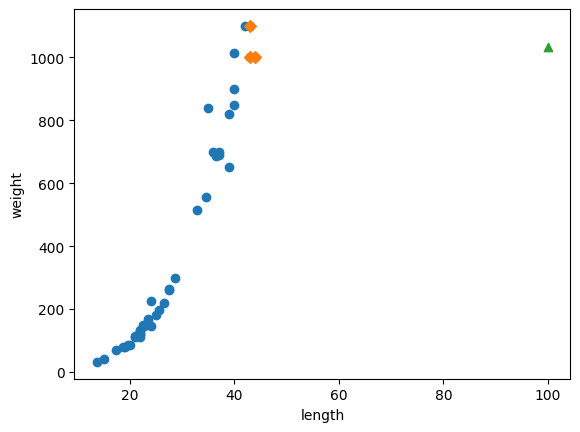

In [18]:
distances, indexes = knr.kneighbors([[100]])

# 훈련세트의 산점도
plt.scatter(train_input, train_target)

# 훈련 세트 중 이웃들
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

# 100cm 농어
plt.scatter(100, 1033, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형회귀
- 특성이 하나인 어떤 직선을 학습하는 알고리즘
- 직선은 데이터의 특성을 잘 나타낼 수 있어야 한다
- 결정계수의 절대값이 낮으면 그 직선이 데이터를 잘 나타낸다고 볼 수 있다
- 이것을 구현한 것이 사이킷런의 **LinearRegression** 클래스

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형회귀 모델을 훈련한다
lr.fit(train_input, train_target)

# 수상한 농어를 예측하자
lr.predict([[50]])

# array([1241.83860323])
# 아까보다 200cm 정도 큰 값...잘 예측하는 듯하다

array([1241.83860323])

### 선형회귀 모델의 파라미터
- coef_ : 계수. 즉 직선의 기울기
- intercept_ : 절편. x가 0일때 y의 값

> **💡 모델기반 학습 vs 사례기반 학습**  
대다수 머신러닝 모델에서 훈련이란, 최적의 파라미터를 찾는 것과 같다. 이것을 **모델기반 학습**이라고 한다.  
반면 k_최근접이웃 모델에는 파라미터가 없고, 훈련세트를 저장하는 것이 전부였다.이것을 **사례기반 학습**이라고 한다.


In [23]:
# lr 객체의 coef_, intercept_ 모델에서 직선의 기울기와 절편을 확인해보자
lr.coef_, lr.intercept_

(array([39.01714496]), -709.0186449535477)

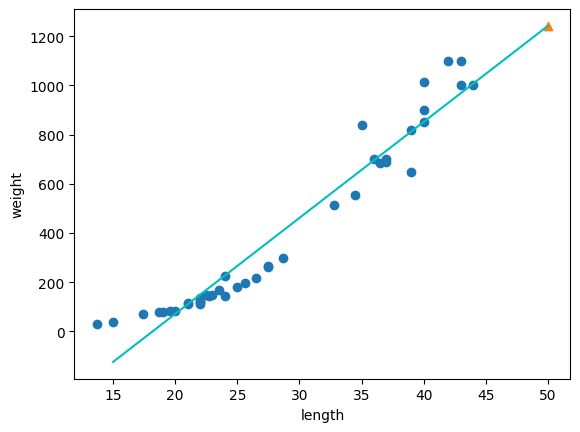

In [28]:
# 위 직선을 길이 15에서 50까지를 범위로 하여 그려보자

# 훈련세트의 산점도
plt.scatter(train_input, train_target)

# 15~50까지 1차 방정식 그래프
plt.plot([15,50], [15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_], c='c')

# 50cm 농어도 그리자
plt.scatter(50, 1241.8, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
# 오버피팅 여부를 파악하기 위해 훈련세트와 테스트 세트의 R^2값도 확인한다
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# 0.939846333997604
# 0.8247503123313558

0.939846333997604
0.8247503123313558


위 값을 보면 다소 차이가 난다.... 근데 그래프 자체도 이상하다. 직선을 그리면 왼쪽 끝이 음수가 된다. 무게가 -인 농어는 없다.  
이 농어를 잘 나타내는 그래프는 직선보다는 곡선에 가깝다. 농어의 데이터를 제곱하여 새로운 열을 원래데이터에 붙인 후 곡선그래프를 그려보자
- **colum_stack** : 원래 데이터(train,test 모두!)의 앞에 새로운 데이터를 붙일 때 사용하는 넘파이의 메서드이다

In [32]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [33]:
# 잘 붙여졌는지 배열의 크기를 확인해보자
train_poly.shape,test_poly.shape

((42, 2), (14, 2))

In [35]:
# 직접 확인도 해보자
train_poly # 맨 앞에 길이를 제곱한 열이 추가되었다

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [44]:
# 이제 무게 50cm 농어의 무게를 예측해보자
# 훈련 시 모델에 농어 길이 제곱한 것과 길이를 함께 넣어줬으므로(배열로 묶어서), 예측할 때도 두 값을 모두 넣어준다
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.predict([[50**2, 50]])

## array([1573.98423528])

array([1573.98423528])

In [45]:
# 새로운 곡선의 계수와 y절편도 확인해보자
lr.coef_, lr.intercept_

# (array([  1.01433211, -21.55792498]), 116.0502107827827)
# [x^2의 계수, x의 계수], y 절편
# y = 1.01 * x^2 -21.6 * x + 116.05
# 다항식으로 이루어진 그래프를 이용한 모델을 다항회귀한다

(array([  1.01433211, -21.55792498]), 116.0502107827827)

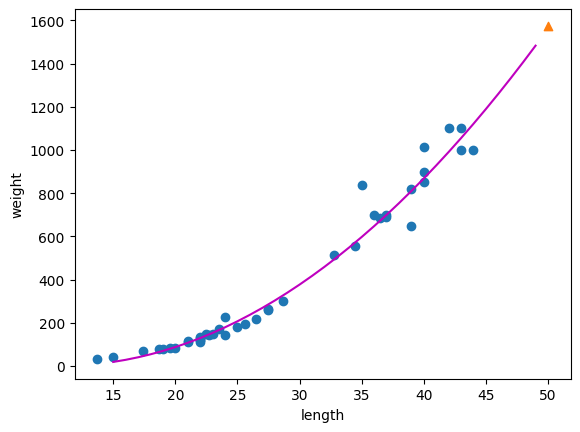

In [46]:
# 곡선과 산점도도 그려보자

# 구간별 직선을 그리기 위해 15~49까지 정수 배열을 만든다
point = np.arange(15,50)

# 훈련세트의 산점도를 그린다
plt.scatter(train_input, train_target)

# 15~49까지 2차 방정식 그래프를 그리자
plt.plot(point, 1.01*point**2 -21.6*point + 116.05, c='m')

# 50cm 농어 데이터도 표시하자
plt.scatter(50,1574, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련세트의 경향을 잘 따르면서, 무게가 음수가 나올 일도 없어졌다!

In [48]:
# 훈련세트, 테스트세트 각각에 대해 R^2도 구해보자
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 점수가 크게 좋아졌다.
# 하지만 테스트세트 점수 > 훈련세트 점수 이므로 과소적합문제가 남아있다

0.9706807451768623
0.9775935108325122
